# Japanese Fans - Hexagonal

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import logging
import matplotlib.pyplot as plt
import numpy as np

from hexagon_utilities import *
from colors import *
import plot_functions as pf
from hex_trees import *
from matplotlib.patches import Ellipse


## Algorithm Steps

1. Take a point in Edge 4 (bottom edge) near the middle.
2. Take 1-2 points in Edges 3, 2, 1, 0, and 5
3. Form Polygons emp, vertex, pt etc.
4. Texture/color the Polygon



## Try it on one Hexagon

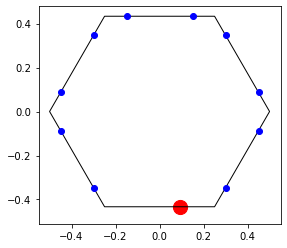

In [304]:
h0 = Hex(0, 0, size=0.5)
h0.render(fc='none', color='k')

fan_base=4
fb = h0.point(pt_name='edge', index=4, dist=np.random.uniform(0.3,0.7))[0]
plt.scatter(fb[0], fb[1], color='r', s=200)


for ende in range(6):
    if ende != fan_base:
        for dist in [0.2, 0.8]:
            pt = h0.point(pt_name = 'edge', index = ende, dist=dist)[0]
            plt.plot(pt[0], pt[1], 'bo')
    
plt.axis('scaled');

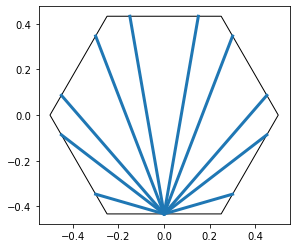

In [15]:
h0 = Hex(0, 0, size=0.5)
h0.render(fc='none', color='k')
start_edge = 'e4'
for ende in ['e3', 'e2', 'e1', 'e0', 'e5'  ]:
    for dist in [0.2, 0.8]:
        h0.line(start_point=start_edge, end_point=ende, start_pos='mid', end_pos=dist, lw=3)
    
    
plt.axis('scaled');

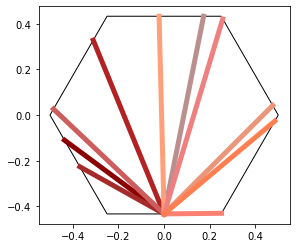

In [33]:
h0 = Hex(0, 0, size=0.5)
h0.render(fc='none', color='k')
start_edge = 'e4'
cfam = RED_BROWNS
col_index = 0
for ende in ['e3', 'e2', 'e1', 'e0', 'e5'  ]:
    for epts in range(2):
        start_a = epts/2
        dist = np.random.uniform(start_a, start_a+0.5)        
        col_index += 1
        color = cfam[col_index%len(cfam)]
        
        h0.line(start_point=start_edge, end_point=ende, start_pos='mid', end_pos=dist, lw=5,
               color=color)
    
    
plt.axis('scaled');

## Let's create Polygons

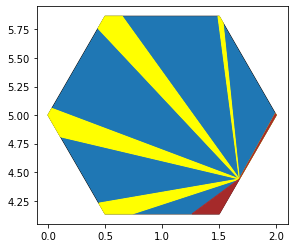

In [287]:
debug=True
h = Hex(1, 5, size=1)
h.render(fc='none', color='k')
fan_base = 4
cfam = RED_BROWNS
col_index = 0
        
fan_base=5

fb = h.point(pt_name='edge', index=fan_base, dist=np.random.uniform(0.3,0.7))[0]

verts = h.get_verts()
new_pts = {}
for index in range(6):
    p = h.point(pt_name='edge', index=index, dist=np.random.uniform(0,0.4))[0]
    q = h.point(pt_name='edge', index=index, dist=np.random.uniform(0.6,1))[0]
    new_pts[index] = (verts[index], p, q)

    
for ky in new_pts.keys():
    if ky != fan_base:
        pt_list= [new_pts[ky][1], new_pts[ky][2], fb]     
        h.render_polygon(pt_list, include_center=False, ax=None)
        pt_list= [verts[ky], new_pts[ky][1], fb, new_pts[(ky-1)%6][2]]     
        h.render_polygon(pt_list, include_center=False, ax=None, color='yellow')
        
base_col = 'brown'
#prebase traingle...
pt_list = [new_pts[(fan_base-1)%6][2], verts[fan_base], fb]
h.render_polygon(pt_list, include_center=False, ax=None, color=base_col)
pt_list = [new_pts[(fan_base+1)%6][1], verts[(fan_base+1)%6], fb]
h.render_polygon(pt_list, include_center=False, ax=None, color=base_col)
        
        
plt.axis('scaled');

In [226]:
6+1%6

7

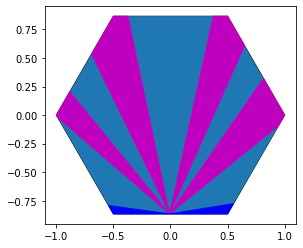

In [154]:
    
#take every pair of points and form triangles...
for p in range(0, len(new_pts), 2):
    #print(new_pts[p], new_pts[p+1])
    pt_list= [new_pts[p], new_pts[p+1], fb]
    h0.render_polygon(pt_list, include_center=False, ax=None)

    
vertex = iter(h0.get_verts())
#take every pair of points that lie on DIFFERENT Edges, take the inbetween vertex, and form quadrilaterals
np_order = [(9,0), (1,2), (3,4), (5,6)]

for n0, n1 in np_order:
    pt_list= [new_pts[n0], next(vertex), new_pts[n1], fb]
    h0.render_polygon(pt_list, include_center=False, ax=None, color='m')

pt_list= [new_pts[7], next(vertex), fb]
h0.render_polygon(pt_list, include_center=False, ax=None, color='b')
pt_list= [new_pts[8], next(vertex), fb]
h0.render_polygon(pt_list, include_center=False, ax=None, color='b')
    


plt.axis('scaled');

In [158]:
def hex_cookie_cutter1(h, colors, ax, **kwargs):
    ''' This one just draws lines from fanbase to edge points'''

    if ax is None:
        ax = plt.gca()

    alle = ['e'+str(x) for x in range(6)]
    
    cfam = get_rnd_family() 
    for fan_base in ['e1', 'e3', 'e5']:    
        col_index = 0
        for ende in [e for e in alle if e!= fan_base]:
            for epts in range(2):
                start_a = epts/2
                dist = np.random.uniform(start_a, start_a+0.5)        
                col_index += 1
                color = get_rnd_color_from_family(cfam)
                h.line(start_point=fan_base, end_point=ende, start_pos='mid', end_pos=dist, lw=3,
                       color=color)
        
    return ax,


In [159]:
fan_base = 'e4'
alle = ['e'+str(x) for x in range(6)]
[e for e in alle if e!= fan_base]


['e0', 'e1', 'e2', 'e3', 'e5']

In [160]:
def hex_cookie_cutter2(h, colors, ax, **kwargs):

    if ax is None:
        ax = plt.gca()

    fan_base = 4
    cfam = get_rnd_family() 
    
    fb = h.point(pt_name='edge', index=fan_base, dist=np.random.uniform(0.3,0.7))[0]

    new_pts = []
    for index in range(6):
        if index!=fan_base:
            p = h.point(pt_name='edge', index=index, dist=np.random.uniform(0,0.4))[0]
            q = h.point(pt_name='edge', index=index, dist=np.random.uniform(0.6,1))[0]
            new_pts.extend([p, q])

    for p in range(0, len(new_pts), 2):
        #print(new_pts[p], new_pts[p+1])
        pt_list= [new_pts[p], new_pts[p+1], fb]
        h.render_polygon(pt_list, include_center=False, ax=ax, fc = get_rnd_color_from_family(cfam))
        
    return ax,


# Fan Variations
1. Each Hex is identical
2. 1 vs 2 points in each Edge
3. Vertices form triangles, or quads
4. Smaller Polygons inside each (echo chamber)
5. Color Variations
6. Color only alternate Polygons
6. Multiple Fan origin


In [275]:
def hex_cookie_cutter(h, color_d, dir_d, ax, **kwargs):

    if ax is None:
        ax = plt.gca()

    fan_base = dir_d['fan_base']
    
    fan_base = np.random.randint(6)    
    fb = h.point(pt_name='edge', index=fan_base, dist=np.random.uniform(0.3,0.7))[0]

    verts = h.get_verts()
    new_pts = {}
    for index in range(6):
        p = h.point(pt_name='edge', index=index, dist=np.random.uniform(0,0.4))[0]
        q = h.point(pt_name='edge', index=index, dist=np.random.uniform(0.6,1))[0]
        new_pts[index] = (verts[index], p, q)

    cfam = PURPLES_LOW_SAT
    cfam2 = GREENS_LOW_SAT
    for ky in new_pts.keys():
        if ky != fan_base:
            pt_list= [new_pts[ky][1], new_pts[ky][2], fb]     
            h.render_polygon(pt_list, include_center=False, ax=None, color=cfam[ky])
            pt_list= [verts[ky], new_pts[ky][1], fb, new_pts[(ky-1)%6][2]]     
            h.render_polygon(pt_list, include_center=False, ax=None, color=get_rnd_color_from_family(cfam2))

    #prebase traingle...
    pt_list = [new_pts[(fan_base-1)%6][2], verts[fan_base], fb]
    h.render_polygon(pt_list, include_center=False, ax=None, color=cfam[3])
    #postbase triangle
    pt_list = [new_pts[(fan_base+1)%6][1], verts[(fan_base+1)%6], fb]
    h.render_polygon(pt_list, include_center=False, ax=None, color=cfam[3])
            
    return ax,

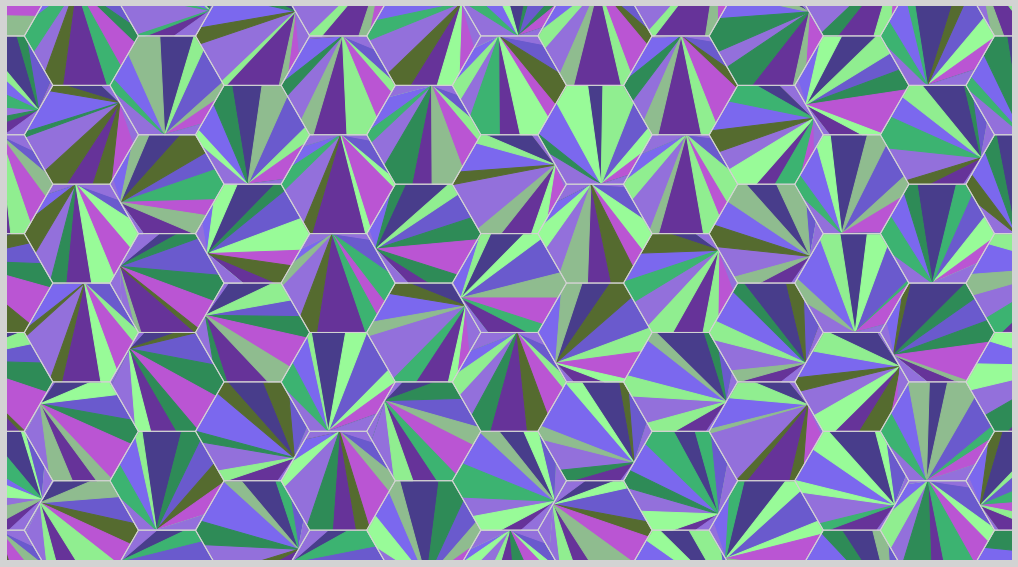

In [276]:
def main():
    
    logging.basicConfig(filename='hexagon_designs.log',level=logging.INFO)    
    nbk = 19
    
    fig, ax = plt.subplots(figsize=(18,12))

    bg_color = 'lightgray'
    fig.patch.set_facecolor(bg_color)

    size=2
    num_rows, num_cols = 16, 11
    
    hg = HexGrid(num_rows, num_cols, size, flat=True)
    
    COL = PURPLES + BLUES_HIGH_SAT 
    COL = get_rnd_family() 
    #    COL = HIGH_SAT
    
    dir_d = {'fan_base':2}
    color_d = {k: get_random_color() for k in range(2)}
    color_d[0] =  'antiquewhite'
    color_d[1] = 'dodgerblue'
    color_d[2] = color_d[0]
    
    for h in hg.hlist:
        hex_cookie_cutter(h, color_d, dir_d, ax)
        h.render(fill=None, lw=1, color=bg_color, zorder=3)
    
    plt.axis('scaled')
    xclip, yclip = 0.8, 0.7
    y_range = size * 1.732 * num_rows / 4 * yclip
    x_range = size * num_cols * xclip
    ax.set_ybound(lower=-1*y_range, upper=y_range)
    ax.set_xbound(lower=-1*x_range, upper=x_range)
    plt.axis('off')
    
    pf.save_file(fig, 
              f'Japanese_fan_',
              nbk = nbk,
              num_rows=num_rows, 
              num_cols=num_cols
            )

    
    logging.info('Finished')

if __name__ == '__main__':
    main()


In [280]:
import os
os.getcwd()

'C:\\Users\\ramna\\PyLibrary\\hexagons'

In [284]:
!dir images\\temp

 Volume in drive C is Windows-SSD
 Volume Serial Number is 7636-A3E8

 Directory of C:\Users\ramna\PyLibrary\hexagons\images\temp

06/16/2020  11:26 PM    <DIR>          .
06/16/2020  11:26 PM    <DIR>          ..
06/14/2020  11:29 PM           331,978 19_r_11_c_6_Japanese_fan__2020-06-14_23-29-25_PM.jpg
06/16/2020  11:14 PM           267,440 19_r_14_c_11_Japanese_fan__2020-06-16_23-14-32_PM.jpg
06/16/2020  11:15 PM           277,739 19_r_14_c_11_Japanese_fan__2020-06-16_23-15-33_PM.jpg
06/16/2020  11:16 PM           309,055 19_r_14_c_11_Japanese_fan__2020-06-16_23-16-37_PM.jpg
06/16/2020  11:18 PM           288,846 19_r_14_c_11_Japanese_fan__2020-06-16_23-18-26_PM.jpg
06/16/2020  11:21 PM           275,363 19_r_14_c_11_Japanese_fan__2020-06-16_23-21-26_PM.jpg
06/16/2020  11:23 PM           229,531 19_r_14_c_11_Japanese_fan__2020-06-16_23-23-42_PM.jpg
06/16/2020  11:24 PM           260,006 19_r_16_c_11_Japanese_fan__2020-06-16_23-24-12_PM.jpg
06/16/2020  11:25 PM           334,732 19_r

In [286]:
os.listdir('images/temp')

['19_r_11_c_6_Japanese_fan__2020-06-14_23-29-25_PM.jpg',
 '19_r_14_c_11_Japanese_fan__2020-06-16_23-14-32_PM.jpg',
 '19_r_14_c_11_Japanese_fan__2020-06-16_23-15-33_PM.jpg',
 '19_r_14_c_11_Japanese_fan__2020-06-16_23-16-37_PM.jpg',
 '19_r_14_c_11_Japanese_fan__2020-06-16_23-18-26_PM.jpg',
 '19_r_14_c_11_Japanese_fan__2020-06-16_23-21-26_PM.jpg',
 '19_r_14_c_11_Japanese_fan__2020-06-16_23-23-42_PM.jpg',
 '19_r_16_c_11_Japanese_fan__2020-06-16_23-24-12_PM.jpg',
 '19_r_16_c_11_Japanese_fan__2020-06-16_23-25-58_PM.jpg',
 '19_r_16_c_11_Japanese_fan__2020-06-16_23-26-26_PM.jpg',
 '19_r_16_c_12_Japanese_fan__2020-06-16_23-10-48_PM.jpg',
 '19_r_16_c_12_Japanese_fan__2020-06-16_23-11-11_PM.jpg',
 '19_r_16_c_12_Japanese_fan__2020-06-16_23-12-08_PM.jpg',
 '19_r_20_c_13_Japanese_fan__2020-06-14_23-29-56_PM.jpg',
 '19_r_20_c_13_Japanese_fan__2020-06-14_23-30-49_PM.jpg',
 '19_r_20_c_13_Japanese_fan__2020-06-14_23-31-58_PM.jpg',
 '19_r_25_c_16_Japanese_fan__2020-06-14_23-32-41_PM.jpg',
 '19_r_25_c_16_